# Objective : -- > This is a usecase where we need  to predict the doctor’s consulting fee.

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
doc_df=pd.read_excel('Final_Train.xlsx')

# Finding insights of the data and what it consist of

In [3]:
doc_df.head()

,Qualification,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
doc_df.tail()

,Qualification,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [5]:
doc_df.shape

(5961, 7)

In [6]:
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Qualification        5961 non-null   object
 1   Experience in years  5961 non-null   int64 
 2   Rating               2659 non-null   object
 3   Place                5936 non-null   object
 4   Profile              5961 non-null   object
 5   Miscellaneous_Info   3341 non-null   object
 6   Fees                 5961 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 326.1+ KB


In [7]:
#finding different Qualifications presnet in the dataset and their count
print(doc_df['Qualification'].unique())
print("\n")
print(doc_df['Qualification'].value_counts())

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']


BDS                                                                                      488
BHMS                                                                                     477
BAMS                                                                                     471
MBBS                                                                                     334
MBBS, MS - ENT                                                                           220
                                                                                        ... 
MDS - Prosthodontics, BDS, MDS - Prosthodontist And Crown Bridge                           1
MBBS,

In [8]:
#finding different Ratings presnet in the dataset and their count
print(doc_df['Rating'].unique())
print("\n")
print(doc_df['Rating'].value_counts())

['100%' '98%' nan '99%' '79%' '95%' '97%' '94%' '88%' '90%' '80%' '93%'
 '36%' '78%' '87%' '96%' '82%' '89%' '74%' '86%' '92%' '83%' '76%' '85%'
 '56%' '91%' '68%' '60%' '75%' '69%' '73%' '67%' '77%' '33%' '55%' '71%'
 '84%' '45%' '63%' '72%' '81%' '62%' '57%' '7%' '48%' '40%' '70%' '64%'
 '65%' '47%' '58%' '53%']


100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
67%      12
81%      12
71%       9
76%       9
75%       8
73%       8
60%       7
74%       7
78%       6
68%       5
56%       5
69%       4
70%       4
72%       3
57%       3
62%       2
64%       2
55%       2
63%       2
33%       2
36%       1
48%       1
47%       1
58%       1
53%       1
45%       1
65%       1
7%        1
40%       1
Name: Rating, dtype: int64


In [9]:
#finding different Place presnet in the dataset and their count
print(doc_df['Place'].unique())
print("\n")
print(doc_df['Place'].value_counts())

['Kakkanad, Ernakulam' 'Whitefield, Bangalore'
 'Mathikere - BEL, Bangalore' 'Bannerghatta Road, Bangalore'
 'Keelkattalai, Chennai' 'Porur, Chennai' 'Karol Bagh, Delhi'
 'Arekere, Bangalore' 'Old City, Hyderabad' 'Athani, Ernakulam'
 'Thousand Lights, Chennai' 'Somajiguda, Hyderabad'
 'Coimbatore Racecourse, Coimbatore' 'Jubilee Hills, Hyderabad'
 'Kondli, Delhi' 'Saroor Nagar, Hyderabad' 'Tambaram West, Chennai'
 'Purasawakkam, Chennai' 'KPHB, Hyderabad' 'HSR Layout, Bangalore'
 'Pollachi, Coimbatore' 'Vasundhra Enclave, Delhi' 'Chembur, Mumbai'
 'Thammanam, Ernakulam' 'Andheri, Mumbai' 'Pattom, Thiruvananthapuram'
 'Kukatpally, Hyderabad' 'Vadavalli, Coimbatore' 'Defence Colony, Delhi'
 'Banjara Hills, Hyderabad' 'Sion West, Mumbai' 'CR Park, Delhi'
 'Mogappair East, Chennai' 'IP Extension, Delhi'
 'Safdarjung Enclave, Delhi' 'New Friends Colony, Delhi'
 'Borivali West, Mumbai' 'Saket, Delhi' 'Malad, Mumbai'
 'Hyder Nagar, Hyderabad' 'Dahisar West, Mumbai' 'RT Nagar, Bangalore'
 'Po

In [10]:
#finding different Profile presnet in the dataset and their count
print(doc_df['Profile'].unique())
print("\n")
print(doc_df['Profile'].value_counts())

['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']


Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [11]:
#finding different Miscellaneous_Information presnet in the dataset and their count
print(doc_df['Miscellaneous_Info'].unique())
print("\n")
print(doc_df['Miscellaneous_Info'].value_counts())

['100% 16 Feedback Kakkanad, Ernakulam'
 '98% 76 Feedback Whitefield, Bangalore' nan ...
 '98% 45 Feedback Basavanagudi, Bangalore'
 '97% 11 Feedback Greater Kailash Part 2, Delhi'
 'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment']


Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                                               40
Tooth Extraction Dental Fillings Scaling / Polishing                                                             12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                                            12
Skin Allergy Treatment Skin Allergies Dermabrasion                                                                9
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment                              9
                                                                                                                 ..
RCT - Single Sitting Dental Fillings 

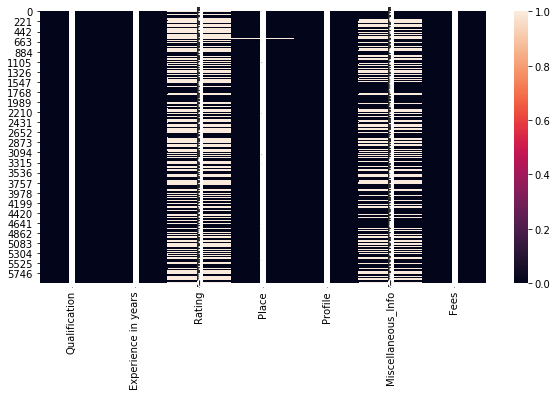

In [12]:
#checking null values
plt.figure(figsize=(10,5))
sns.heatmap(doc_df.isnull(),annot=True)

In [13]:
doc_df.isnull().sum()

Qualification             0
Experience in years       0
Rating                 3302
Place                    25
Profile                   0
Miscellaneous_Info     2620
Fees                      0
dtype: int64

In [14]:
#here first performing data_cleaning as it is not clear what the values in the dataset is conveying

In [15]:
#Sorting and checking the Qualification Column for any Unusual Character

sorted(doc_df.Qualification[doc_df.Qualification.apply(lambda x: len(x.split(','))).idxmax()].split(","))

[' Certificate in Cosmetic Dentistry',
 ' Certification in Full Mouth Rehabilitation',
 ' Certified Advance Course In Endodontics',
 ' Certified BPS Dentist',
 ' Certified in Orthodontics',
 ' Degree in Dental Implant',
 ' Fellowship in Advanced Endoscopic Sinus Surgery',
 ' Fellowship in Lasers & Cosmetology',
 ' Professional Implantology Training Course (PITC)',
 'Fellowship in Oral implantlogy']

In [16]:
import re

In [17]:
# Defining function Clear_Qual to remove inconsistence data
def Clear_Qual(text):
    arr = re.sub(r'\([^()]+\)', lambda x: x.group().replace(",","-"), text) # to replace ',' with '-' inside brackets only
    return ','.join(sorted(arr.lower().replace(" ","").split(",")))

In [18]:
#Applying the function on the Qualification set
doc_df.Qualification =doc_df.Qualification.apply(lambda x: Clear_Qual(x))

In [19]:
#cleaning Qualification column by dividing qualification column into max qualification a doctor can posses
#findin maximum length of Qualification column
max_qual_length=-1
for i in range(len(doc_df["Qualification"])):
    temp=len(doc_df["Qualification"].iloc[i].strip().upper().split(","))
    if temp>max_qual_length:
        max_qual_length=temp
print("Max qualification length is :{}".format(max_qual_length))


Max qualification length is :10


In [20]:
#creating 10 parts of qualification column as qualification-1, qualification and so on
qualification_1=list()
qualification_2=list()
qualification_3=list()
qualification_4=list()
qualification_5=list()
qualification_6=list()
qualification_7= list()
qualification_8=list()
qualification_9=list()
qualification_10=list()

for i in range(len(doc_df["Qualification"])):
    temp=doc_df["Qualification"].iloc[i].split(",")
    try :
                qualification_1.append(temp[0].strip().upper())
    except :
                qualification_1.append('NONE')
    try :
                qualification_2.append(temp[1].strip().upper())
    except :
                qualification_2.append('NONE')
            
    try :
                qualification_3.append(temp[2].strip().upper())
    except :
                qualification_3.append('NONE')
            
    
    try :
                qualification_4.append(temp[3].strip().upper())
    except :
                qualification_4.append('NONE')
            
    try :
                qualification_5.append(temp[4].strip().upper())
    except :
                qualification_5.append('NONE')
                                       
                                       
    try :
                qualification_6.append(temp[5].strip().upper())
    except :
                qualification_6.append('NONE')     
                                       
    try :
                qualification_7.append(temp[6].strip().upper())
    except :
                qualification_7.append('NONE')
     
                                       
    try :
                qualification_8.append(temp[7].strip().upper())
    except :
                qualification_8.append('NONE')                                  
                                  
                                       
                                       
    try :
                qualification_9.append(temp[8].strip().upper())
    except :
                qualification_9.append('NONE')
                                       
                                       
                                       
                                       
    try :
                qualification_10.append(temp[9].strip().upper())
    except :
                qualification_10.append('NONE')                               
                                       
                                       
                                       
                                       
                                       
                                       
                                       
                                       

In [21]:
doc_df['qualification_1']=qualification_1
doc_df['qualification_2']=qualification_2
doc_df['qualification_3']=qualification_3
doc_df['qualification_4']=qualification_4
doc_df['qualification_5']=qualification_5
doc_df['qualification_6']=qualification_6
doc_df['qualification_7']=qualification_7
doc_df['qualification_8']=qualification_8
doc_df['qualification_9']=qualification_9
doc_df['qualification_10']=qualification_10

In [22]:
doc_df

,Qualification,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,qualification_1,qualification_2,qualification_3,qualification_4,qualification_5,qualification_6,qualification_7,qualification_8,qualification_9,qualification_10
0,"bhms,md-homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD-HOMEOPATHY,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,"bams,md-ayurvedamedicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD-AYURVEDAMEDICINE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,"mbbs,ms-otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS-OTORHINOLARYNGOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,"bams,bsc-zoology",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BAMS,BSC-ZOOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,bams,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,MBBS,MS-ENT,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5957,mbbs,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5958,mbbs,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,MBBS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5959,"mbbs,md-generalmedicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,MBBS,MD-GENERALMEDICINE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [23]:
#after qualification 2 rarely other qualification consist any data, therefore dropping the qulification_3,qulification_4,and so on
doc_df.drop(['qualification_3','qualification_4','qualification_5','qualification_6','qualification_7','qualification_8','qualification_9','qualification_10'],axis=1,inplace=True)

In [24]:
doc_df.head()

,Qualification,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,qualification_1,qualification_2
0,"bhms,md-homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD-HOMEOPATHY
1,"bams,md-ayurvedamedicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD-AYURVEDAMEDICINE
2,"mbbs,ms-otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS-OTORHINOLARYNGOLOGY
3,"bams,bsc-zoology",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BAMS,BSC-ZOOLOGY
4,bams,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NONE


In [25]:
doc_df.drop(['Qualification'],axis=1,inplace=True)

In [26]:
doc_df.head()

,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,qualification_1,qualification_2
0,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD-HOMEOPATHY
1,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD-AYURVEDAMEDICINE
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS-OTORHINOLARYNGOLOGY
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BAMS,BSC-ZOOLOGY
4,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NONE


In [27]:
#cleaning Rating column and replacing nan values

doc_df['Rating'].fillna('0%',inplace =True) # -- Replacing nan values

#cleaning the Rating Column
doc_df['Rating']=doc_df['Rating'].str.strip("%")
doc_df['Rating']=doc_df['Rating'].astype(float)

In [28]:
doc_df.head()

,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,qualification_1,qualification_2
0,24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD-HOMEOPATHY
1,12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD-AYURVEDAMEDICINE
2,9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS-OTORHINOLARYNGOLOGY
3,12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BAMS,BSC-ZOOLOGY
4,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NONE


In [29]:
#Now clearing the place column and dividing it into patrs as maximum place column length 

In [30]:
#changing datatype of place column
doc_df["Place"]=doc_df["Place"].astype(str)

In [31]:
max_place_length=-1
for i in range(len(doc_df["Place"])):
    temp=len(doc_df["Place"].iloc[i].strip().upper().split(","))
    if temp>max_place_length:
        max_place_length=temp
print("Max qualification length is :{}".format(max_place_length))

Max qualification length is :3


In [32]:
place_1=list()
place_2=list()
place_3=list()

for i in range(len(doc_df["Place"])):
    temp=doc_df["Place"].iloc[i].split(",")
    try :
                place_1.append(temp[0].strip().upper())
    except :
                place_1.append('NONE')
            
    try :
                place_2.append(temp[1].strip().upper())
    except :
                place_2.append('NONE')
            
    try :
                place_3.append(temp[2].strip().upper())
    except :
                place_3.append('NONE')

In [33]:
doc_df['Place_1']=place_1
doc_df['Place_2']=place_2
doc_df['Place_3']=place_3

In [34]:
doc_df.head()

,Experience in years,Rating,Place,Profile,Miscellaneous_Info,Fees,qualification_1,qualification_2,Place_1,Place_2,Place_3
0,24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD-HOMEOPATHY,KAKKANAD,ERNAKULAM,NONE
1,12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD-AYURVEDAMEDICINE,WHITEFIELD,BANGALORE,NONE
2,9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MBBS,MS-OTORHINOLARYNGOLOGY,MATHIKERE - BEL,BANGALORE,NONE
3,12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BAMS,BSC-ZOOLOGY,BANNERGHATTA ROAD,BANGALORE,NONE
4,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NONE,KEELKATTALAI,CHENNAI,NONE


In [35]:
doc_df.drop(['Place'],axis=1,inplace=True)

In [36]:
doc_df

,Experience in years,Rating,Profile,Miscellaneous_Info,Fees,qualification_1,qualification_2,Place_1,Place_2,Place_3
0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD-HOMEOPATHY,KAKKANAD,ERNAKULAM,NONE
1,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD-AYURVEDAMEDICINE,WHITEFIELD,BANGALORE,NONE
2,9,0.0,ENT Specialist,NaN,300,MBBS,MS-OTORHINOLARYNGOLOGY,MATHIKERE - BEL,BANGALORE,NONE
3,12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BAMS,BSC-ZOOLOGY,BANNERGHATTA ROAD,BANGALORE,NONE
4,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NONE,KEELKATTALAI,CHENNAI,NONE
...,...,...,...,...,...,...,...,...,...,...
5956,19,98.0,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,MBBS,MS-ENT,BASAVANAGUDI,BANGALORE,NONE
5957,33,0.0,General Medicine,NaN,100,MBBS,NONE,NUNGAMBAKKAM,CHENNAI,NONE
5958,41,97.0,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,MBBS,NONE,GREATER KAILASH PART 2,DELHI,NONE
5959,15,90.0,General Medicine,General Medical Consultation Viral Fever Treat...,100,MBBS,MD-GENERALMEDICINE,VILEPARLE WEST,MUMBAI,NONE


In [37]:
#we can see in the dataset that place_3 is have almost all none value
doc_df.drop(['Place_3'],axis=1,inplace=True)

In [38]:
doc_df.head()

,Experience in years,Rating,Profile,Miscellaneous_Info,Fees,qualification_1,qualification_2,Place_1,Place_2
0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD-HOMEOPATHY,KAKKANAD,ERNAKULAM
1,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD-AYURVEDAMEDICINE,WHITEFIELD,BANGALORE
2,9,0.0,ENT Specialist,NaN,300,MBBS,MS-OTORHINOLARYNGOLOGY,MATHIKERE - BEL,BANGALORE
3,12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BAMS,BSC-ZOOLOGY,BANNERGHATTA ROAD,BANGALORE
4,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,NONE,KEELKATTALAI,CHENNAI


In [39]:
#miscellaneous_info : miscellaneous is made up of an odd bunch of things — things you might not expect to go together
#therefore this information doctor donot want tto share therefore dropping 'miscellaneous_info' column

doc_df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [40]:
doc_df.head()

,Experience in years,Rating,Profile,Fees,qualification_1,qualification_2,Place_1,Place_2
0,24,100.0,Homeopath,100,BHMS,MD-HOMEOPATHY,KAKKANAD,ERNAKULAM
1,12,98.0,Ayurveda,350,BAMS,MD-AYURVEDAMEDICINE,WHITEFIELD,BANGALORE
2,9,0.0,ENT Specialist,300,MBBS,MS-OTORHINOLARYNGOLOGY,MATHIKERE - BEL,BANGALORE
3,12,0.0,Ayurveda,250,BAMS,BSC-ZOOLOGY,BANNERGHATTA ROAD,BANGALORE
4,20,100.0,Ayurveda,250,BAMS,NONE,KEELKATTALAI,CHENNAI


In [41]:
#finding different Place_1 presnet in the dataset and their count
print(doc_df['Place_1'].unique())
print("\n")
print(doc_df['Place_1'].value_counts())

['KAKKANAD' 'WHITEFIELD' 'MATHIKERE - BEL' 'BANNERGHATTA ROAD'
 'KEELKATTALAI' 'PORUR' 'KAROL BAGH' 'AREKERE' 'OLD CITY' 'ATHANI'
 'THOUSAND LIGHTS' 'SOMAJIGUDA' 'COIMBATORE RACECOURSE' 'JUBILEE HILLS'
 'KONDLI' 'SAROOR NAGAR' 'TAMBARAM WEST' 'PURASAWAKKAM' 'KPHB'
 'HSR LAYOUT' 'POLLACHI' 'VASUNDHRA ENCLAVE' 'CHEMBUR' 'THAMMANAM'
 'ANDHERI' 'PATTOM' 'KUKATPALLY' 'VADAVALLI' 'DEFENCE COLONY'
 'BANJARA HILLS' 'SION WEST' 'CR PARK' 'MOGAPPAIR EAST' 'IP EXTENSION'
 'SAFDARJUNG ENCLAVE' 'NEW FRIENDS COLONY' 'BORIVALI WEST' 'SAKET' 'MALAD'
 'HYDER NAGAR' 'DAHISAR WEST' 'RT NAGAR' 'POWAI' 'BASHEERBAGH'
 'MUSHEERABAD' 'AS RAO NAGAR' 'MADHAPUR' 'GANDHINAGAR' 'CHETPET'
 'VILEPARLE EAST' 'YELAHANKA NEW TOWN' 'KODAMBAKKAM' 'MALLESWARAM'
 'PALLIKARANAI' 'NALLAKUNTA' 'PASCHIM VIHAR' 'MEERA BAGH' 'CHATTARPUR'
 'ANDHERI WEST' 'HIMAYAT NAGAR' 'ADAMBAKKAM' 'PUNJABI BAGH' 'MAHALAXMI'
 'KALINA' 'ATTAPUR' 'LAKDIKAPUL' 'AMBATTUR' 'RAMNAGAR' 'SHALIMAR BAGH'
 'NUNGAMBAKKAM' 'MIYAPUR' 'SAGARPUR' 'GIRGAON' 'JAY

In [42]:
#finding different Place_2 presnet in the dataset and their count
print(doc_df['Place_2'].unique())
print("\n")
print(doc_df['Place_2'].value_counts())

['ERNAKULAM' 'BANGALORE' 'CHENNAI' 'DELHI' 'HYDERABAD' 'COIMBATORE'
 'MUMBAI' 'THIRUVANANTHAPURAM' 'NONE' 'SECTOR 5']


BANGALORE             1258
MUMBAI                1219
DELHI                 1184
HYDERABAD              951
CHENNAI                855
COIMBATORE             228
ERNAKULAM              153
THIRUVANANTHAPURAM      86
NONE                    26
SECTOR 5                 1
Name: Place_2, dtype: int64


In [43]:
#finding different qualification_1 presnet in the dataset and their count
print(doc_df['qualification_1'].unique())
print("\n")
print(doc_df['qualification_1'].value_counts())

['BHMS' 'BAMS' 'MBBS' 'BDS' 'DNB-ENT' 'DIPLOMAINOTORHINOLARYNGOLOGY(DLO)'
 'FELLOWSHIPOFCOLLEGEOFGENERALPRACTICE(FCGP)' 'DDVL' 'IBCLC(USA)'
 'DIPLOMAINDERMATOLOGY' 'DM-NEUROLOGY' 'AFIH'
 'DHMS(DIPLOMAINHOMEOPATHICMEDICINEANDSURGERY)'
 'FELLOWSHIPINDERMATOLOGICALLASERSURGERY' 'DNB' 'D.LITT-DIABETOLOGY' 'DDV'
 'MD-DERMATOLOGY' 'GETINSPIREDBYREMARKABLESTORIESOFPEOPLELIKEYOU' 'BA'
 'MORTH' 'FRCP' 'FAMS-FELLOWSHIPOFTHEACADEMYMEDICINE'
 'DNB-INTERNALMEDICINE' 'DNB-FAMILYMEDICINE'
 'MDS-ORAL&MAXILLOFACIALSURGERY' 'MD-AYURVEDAMEDICINE' 'DLO'
 'DNB-DERMATOLOGY' 'GCEH' 'MS-OTORHINOLARYNGOLOGY'
 'FELLOWSHIPINLASERS&COSMETOLOGY' 'DIPLOMAINPRACTICALDERMATOLOGY'
 'DNB-PAEDIATRICS' 'DNB-NEPHROLOGY' 'FRGUHS' 'FAGE'
 'DIPLOMAINMEDICALRADIO-DIAGNOSIS' 'FELLOWSHIPINMINIMALACCESSSURGERY'
 'DGO' 'FELLOWSHIPINAESTHETICMEDICINE' 'FELLOWSHIPINRHEUMATOLOGY' 'DVD'
 'DIPLOMAINPUBLICHEALTH' 'DM-CRITICALCAREMEDICINE'
 'DNB-OTORHINOLARYNGOLOGY' 'BSAM'
 'CERTIFICATECOURSEINSPORTSANDFITNESSNUTRITION' 'DIPLOMAINENT'
 

In [44]:
#finding different qualification_2 presnet in the dataset and their count
print(doc_df['qualification_2'].unique())
print("\n")
print(doc_df['qualification_2'].value_counts())

['MD-HOMEOPATHY' 'MD-AYURVEDAMEDICINE' 'MS-OTORHINOLARYNGOLOGY'
 'BSC-ZOOLOGY' 'NONE' 'MD-GENERALMEDICINE' 'BSC' 'MBBS' 'MDS'
 'MDS-ORAL&MAXILLOFACIALSURGERY' 'DNB-ENT' 'MF-HOMEOPATHY' 'MS-ENT' 'DNB'
 'FELLOWSHIPINAESTHETICMEDICINE'
 'FELLOWSHIPINCLEFTLIPANDCRANIOFACIALSURGERY' 'DIPLOMAINCOSMETOLOGY'
 'MDS-PROSTHODONTISTANDCROWNBRIDGE' 'M.D.HOM.(PRACTICEOFMEDICINE)'
 'DIPLOMAINCOUNSELLINGSKILLS' 'MD-DERMATOLOGY'
 'MDS-ORALANDMAXILLOFACIALPATHOLOGY' 'MRCS(UK)' 'FRGUHS' 'MS-PSYCHOLOGY'
 'DIPLOMAINSKINAESTHETICS' 'CERTIFICATEINCOSMETICDENTISTRY'
 'MD-RHEUMATOLOGY' 'MDS-PAEDODONTICSANDPREVENTIVEDENTISTRY'
 'MDS-ORALPATHOLOGYANDORALMICROBIOLOGY' 'DOCTOROFSCIENCE(DSC.)'
 'MDS-CONSERVATIVEDENTISTRY&ENDODONTICS' 'FICD' 'VENEREOLOGY&LEPROSY'
 'POSTGRADUATEDIPLOMAINEMERGENCYSERVICES(PGDEMS)'
 'MASTEROFHOSPITALADMINISTRATION' 'MDS-PERIODONTOLOGYANDORALIMPLANTOLOGY'
 'BDS' 'MDS-PERIODONTICS' 'PGDINENDODONTICS' 'MDS-PEDODONTICS'
 'PHD-ORTHODONTICS&DENTOFACIALORTHOPAEDICS' 'MS-AYURVEDA' 'MRCPS'
 'P.

In [45]:
doc_df.isnull().sum()

Experience in years    0
Rating                 0
Profile                0
Fees                   0
qualification_1        0
qualification_2        0
Place_1                0
Place_2                0
dtype: int64

Text(0.5, 1.0, 'Fees W.R.T Profile')

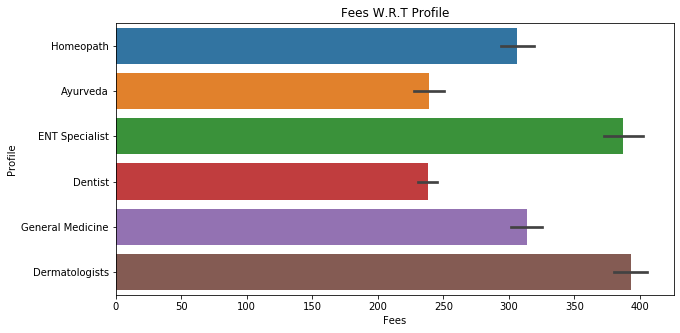

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(doc_df['Fees'],doc_df['Profile'])
plt.title('Fees W.R.T Profile')

Text(0.5, 1.0, 'Fees W.R.T Place_2')

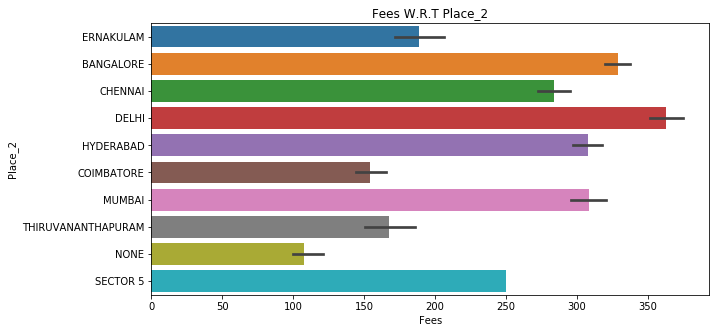

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(doc_df['Fees'],doc_df['Place_2'])
plt.title('Fees W.R.T Place_2')

In [48]:
plt.figure(figsize=(100,250))
sns.barplot(doc_df['Fees'],doc_df['Place_1'])
plt.title('Fees W.R.T Place_1')

Text(0.5, 1.0, 'Fees W.R.T Place_1')

Text(0.5, 1.0, 'Fees W.R.T qualification_1')

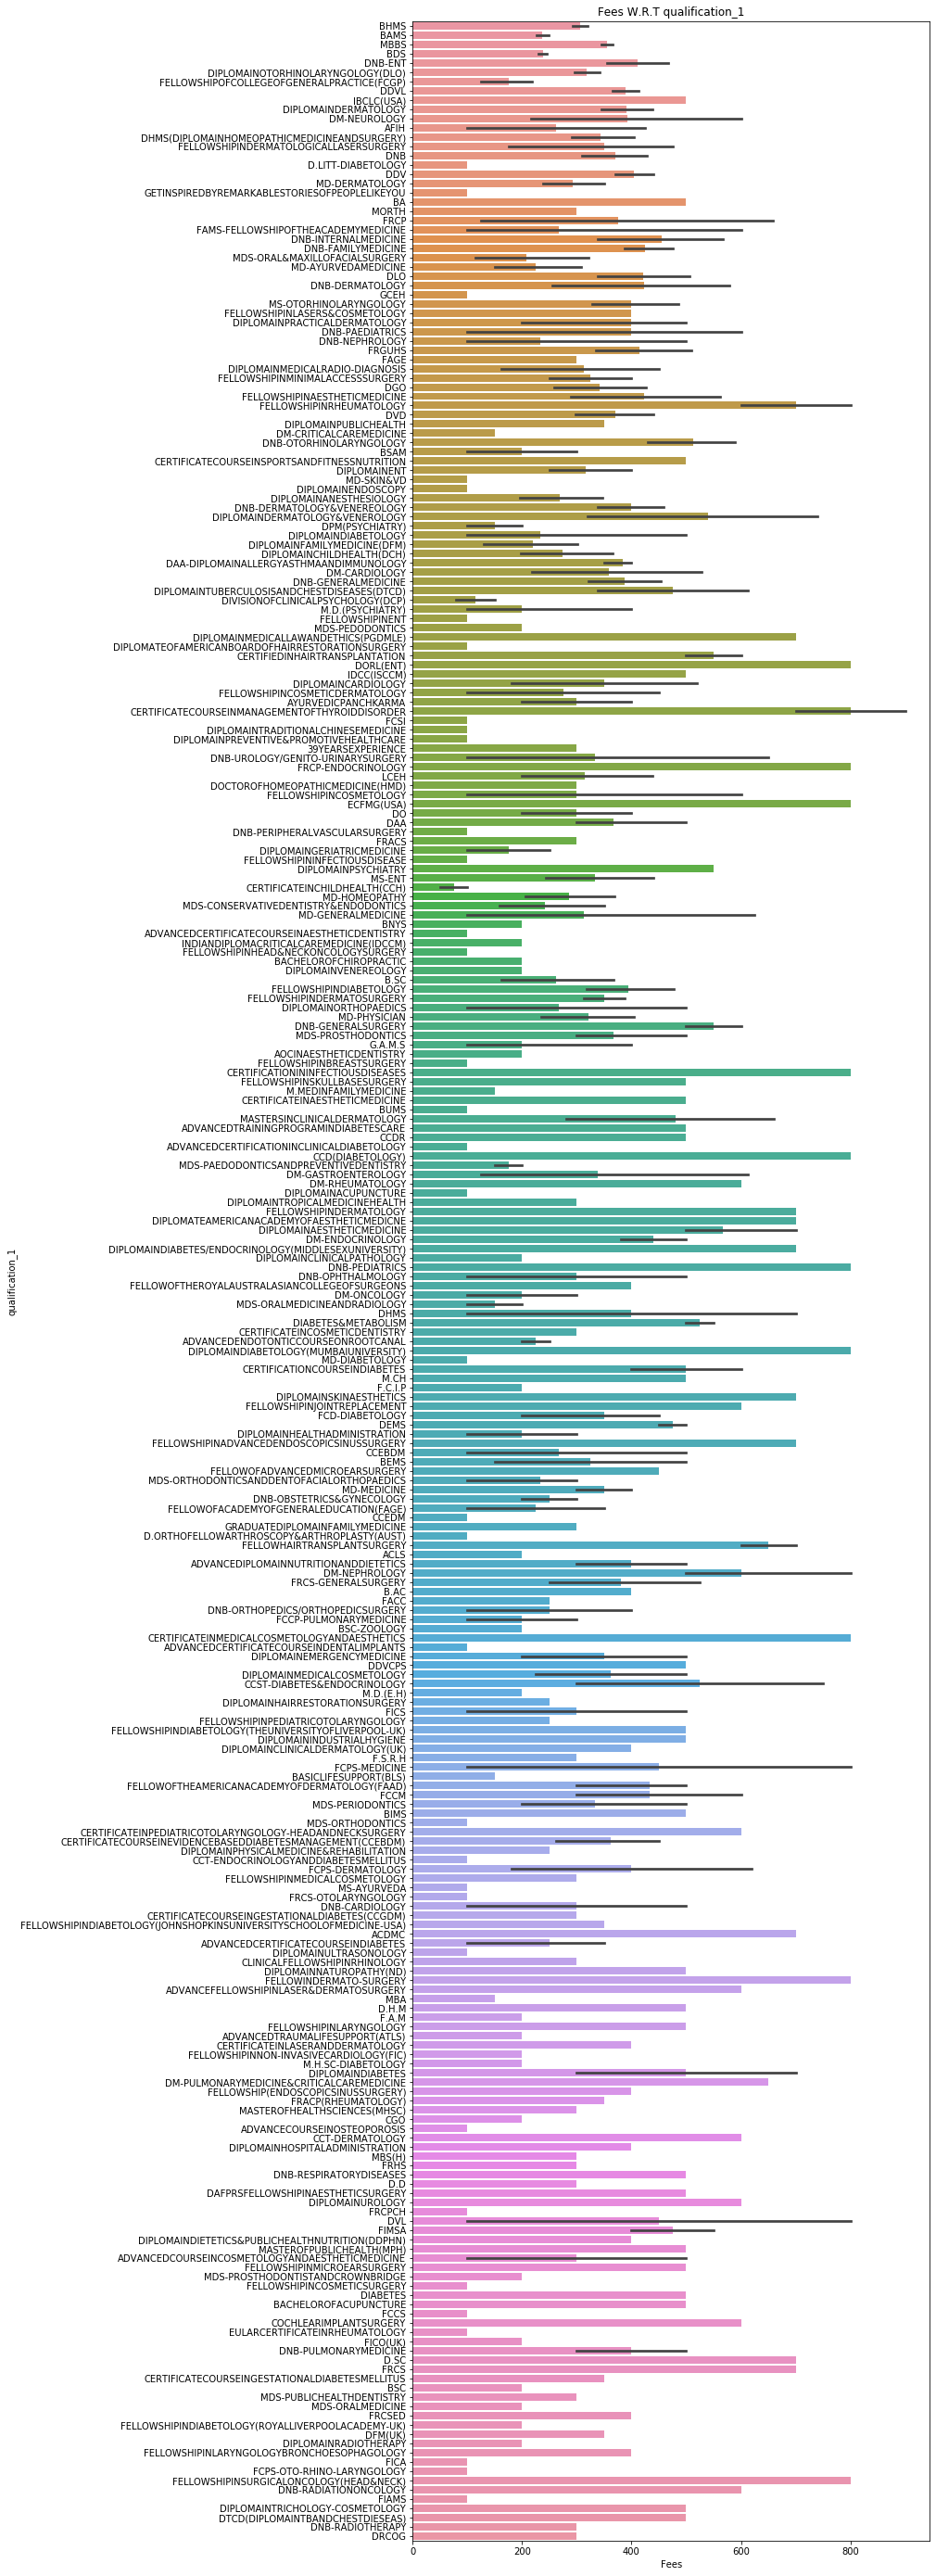

In [49]:
plt.figure(figsize=(10,50))
sns.barplot(doc_df['Fees'],doc_df['qualification_1'])
plt.title('Fees W.R.T qualification_1')

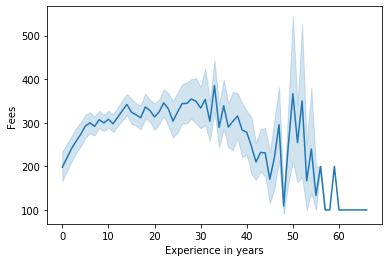

In [50]:
sns.lineplot(doc_df['Experience in years'],doc_df['Fees'])

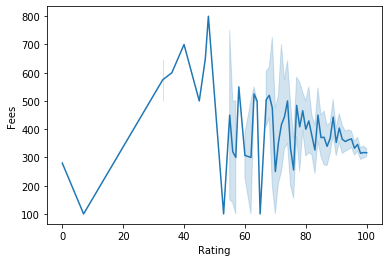

In [51]:
sns.lineplot(doc_df['Rating'],doc_df['Fees'])

# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [52]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [53]:
columns=(lb.fit_transform(doc_df['Profile']),lb.fit_transform(doc_df['qualification_1']),lb.fit_transform(doc_df['qualification_2']),
        lb.fit_transform(doc_df['Place_1']),lb.fit_transform(doc_df['Place_2']))

In [54]:
doc_df['Profile']=columns[0]
doc_df['qualification_1']=columns[1]
doc_df['qualification_2']=columns[2]
doc_df['Place_1']=columns[3]
doc_df['Place_2']=columns[4]

In [55]:
doc_df.head()

,Experience in years,Rating,Profile,Fees,qualification_1,qualification_2,Place_1,Place_2
0,24,100.0,5,100,26,330,294,4
1,12,98.0,0,350,22,316,857,0
2,9,0.0,3,300,246,411,450,0
3,12,0.0,0,250,22,12,65,0
4,20,100.0,0,250,22,422,333,1


# Univariate Analysis

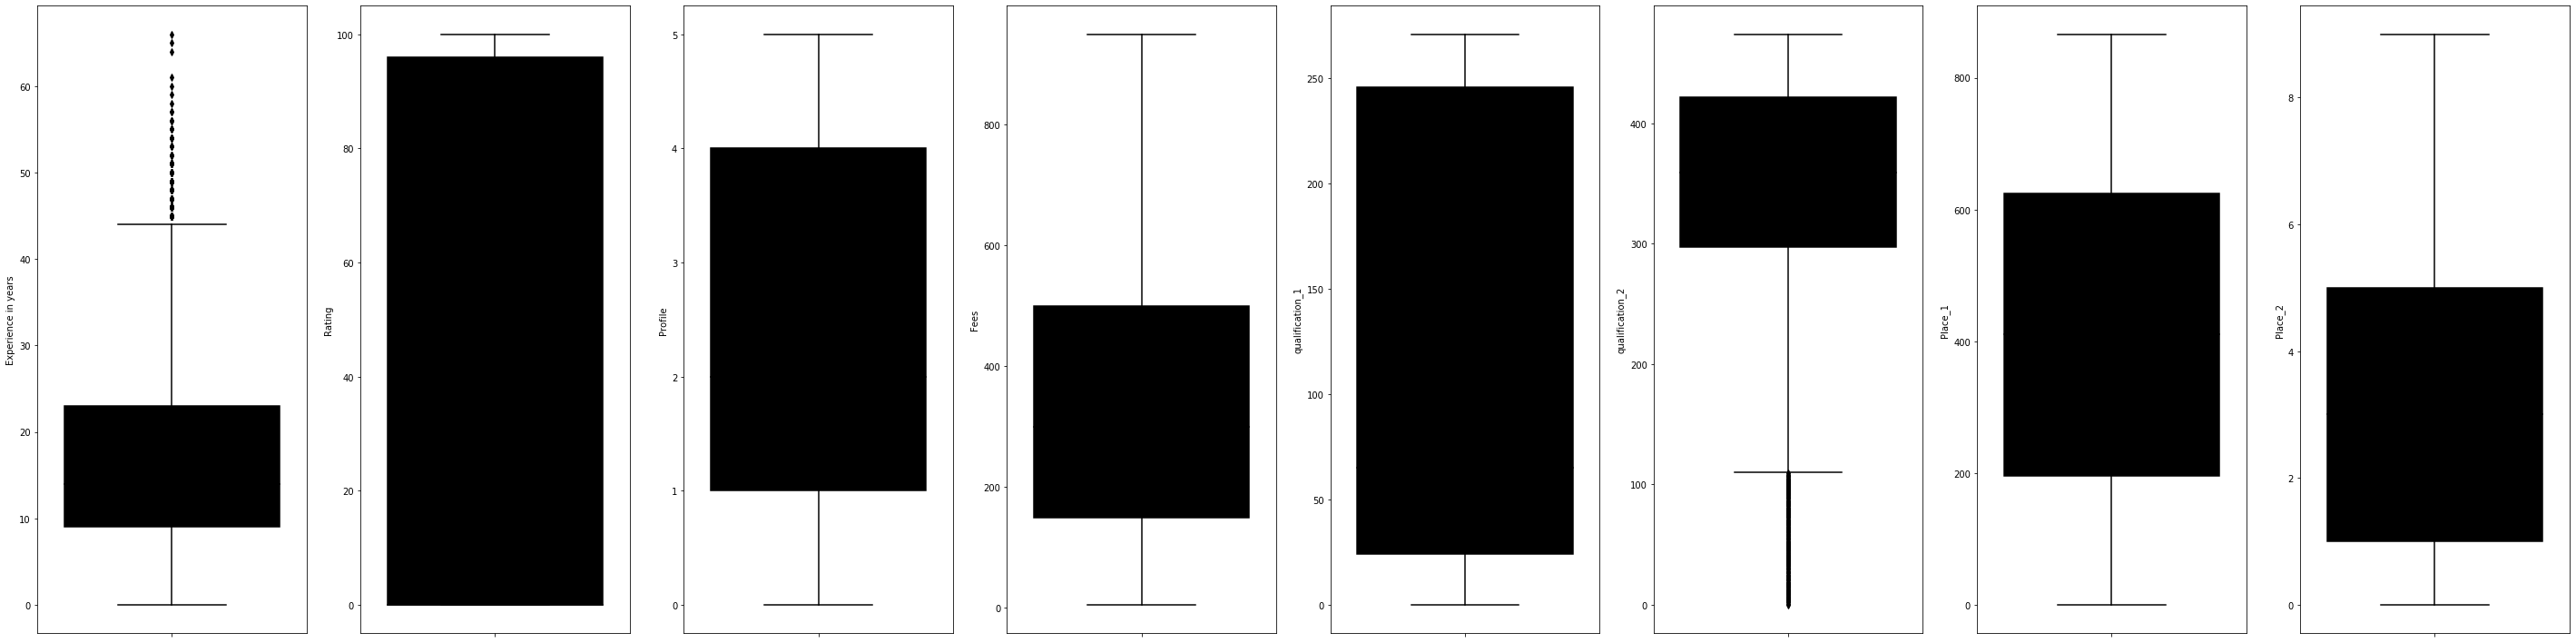

In [56]:
#using boxplot to see outliers and IQR range
collist=doc_df.columns.values
ncol=8
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(doc_df[collist[i]],color='black',orient='v')

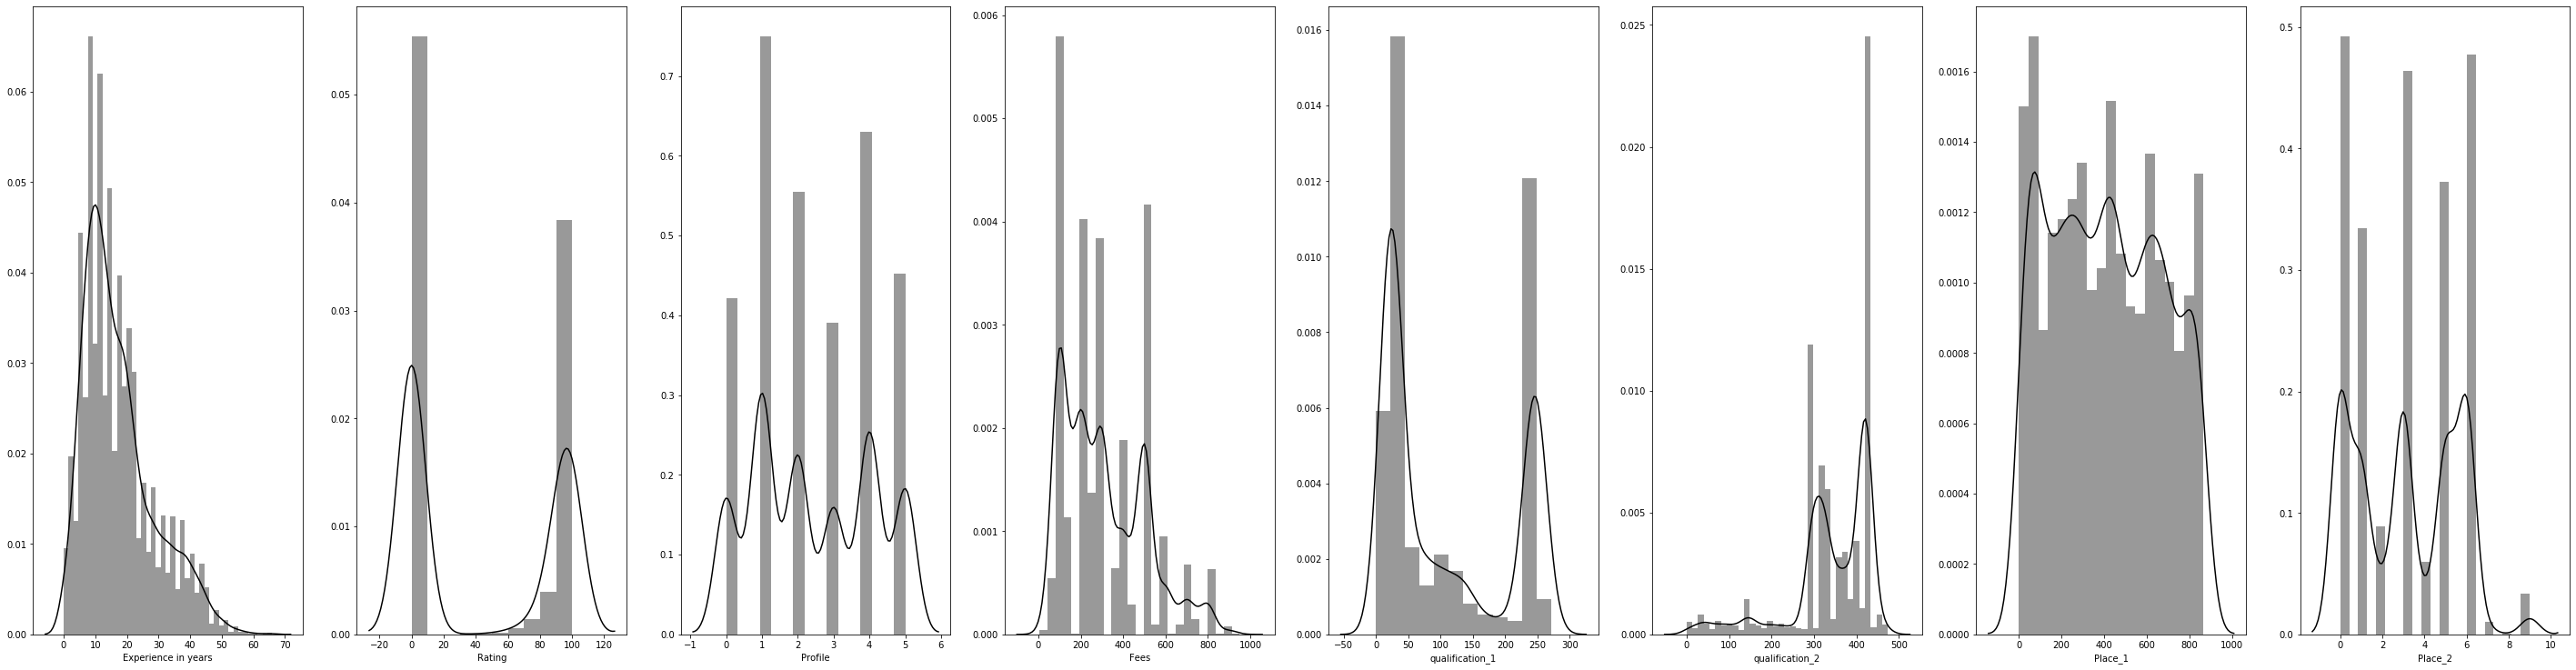

In [57]:
#Cheking the distribution
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(doc_df[collist[i]],color='black')

# Statistical Analysis

In [58]:
doc_df.describe()

,Experience in years,Rating,Profile,Fees,qualification_1,qualification_2,Place_1,Place_2
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,2.441872,307.944640,107.806408,341.909243,412.733602,3.104848
std,11.142798,47.340934,1.658014,190.920373,97.311005,96.586992,254.742847,2.366200
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,1.000000,150.000000,24.000000,297.000000,195.000000,1.000000
50%,14.000000,0.000000,2.000000,300.000000,65.000000,359.000000,410.000000,3.000000
75%,23.000000,96.000000,4.000000,500.000000,246.000000,422.000000,624.000000,5.000000
max,66.000000,100.000000,5.000000,950.000000,271.000000,474.000000,866.000000,9.000000


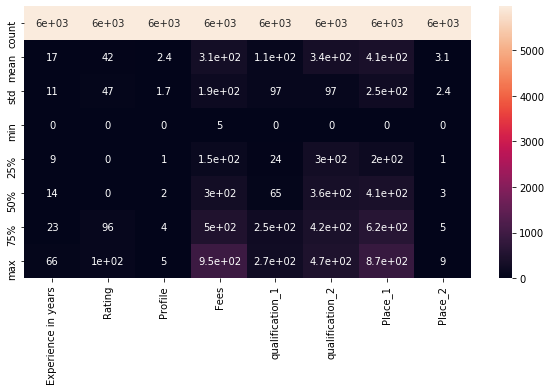

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(doc_df.describe(),annot=True)

In [60]:
doc_cor=doc_df.corr()

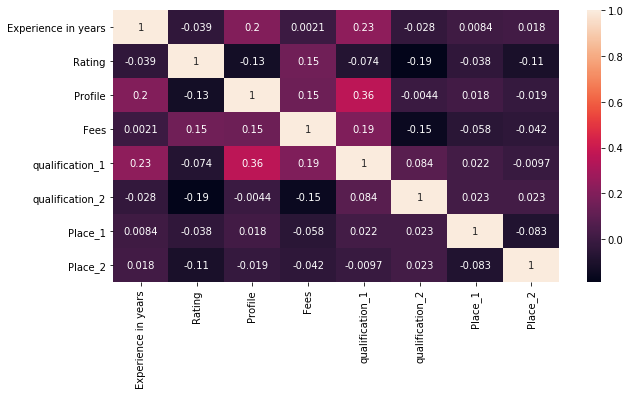

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(doc_cor,annot=True)

In [62]:
doc_cov=doc_df.cov()

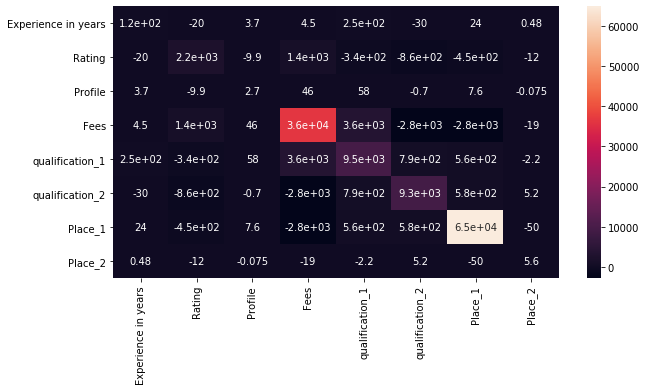

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(doc_cov,annot=True)

In [64]:
#checking the skewness
doc_df.skew()

Experience in years    0.991089
Rating                 0.247186
Profile                0.108803
Fees                   0.751870
qualification_1        0.550342
qualification_2       -1.533785
Place_1                0.102500
Place_2                0.120381
dtype: float64

# Removing The outliers and Skewness

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(doc_df))
print(z)

[[0.60097885 1.22066882 1.54301587 ... 0.12331104 0.46613109 0.37833943]
 [0.47604029 1.17841853 1.47289258 ... 0.26827026 1.74412617 1.31227627]
 [0.74529508 0.89184525 0.33665249 ... 0.71538156 0.14630254 1.31227627]
 ...
 [2.12675597 1.15729339 0.93983418 ... 0.82927808 0.77627377 0.04431449]
 [0.20678551 1.00941741 0.93983418 ... 0.15437373 1.68131247 1.22364728]
 [0.02728232 1.22066882 0.86971089 ... 0.30121237 0.72732931 0.04431449]]


In [66]:
threhold=3

In [67]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([   3,    9,   70,   94,  105,  110,  151,  183,  248,  255,  274,
        275,  293,  325,  357,  372,  434,  447,  487,  613,  624,  698,
        738,  762,  807,  828,  838,  901,  943,  980,  987, 1000, 1008,
       1009, 1062, 1111, 1130, 1136, 1177, 1184, 1199, 1204, 1289, 1314,
       1317, 1318, 1395, 1403, 1450, 1455, 1460, 1492, 1547, 1556, 1570,
       1593, 1609, 1620, 1631, 1657, 1673, 1714, 1716, 1726, 1795, 1825,
       1860, 1906, 1957, 1981, 2023, 2035, 2061, 2062, 2165, 2202, 2227,
       2240, 2248, 2252, 2261, 2262, 2281, 2303, 2350, 2368, 2369, 2393,
       2428, 2450, 2483, 2518, 2522, 2536, 2620, 2622, 2623, 2629, 2631,
       2651, 2708, 2725, 2735, 2768, 2780, 2830, 2850, 2892, 2964, 2967,
       2980, 2988, 2990, 3066, 3091, 3104, 3178, 3180, 3183, 3193, 3237,
       3254, 3281, 3283, 3361, 3365, 3371, 3387, 3389, 3414, 3466, 3473,
       3478, 3490, 3493, 3544, 3562, 3578, 3580, 3608, 3632, 3680, 3706,
       3756, 3832, 3874, 3926, 3942, 3960, 3983, 4

In [68]:
z[3][5]#checking the above output result

3.41595605620273

In [69]:
z[9][5]#checking the above output result

3.4263102858109624

In [70]:
doc_new=doc_df[(z<3).all(axis=1)]  #removing outliers

In [71]:
print("Shape of the dataset before removing outliers",doc_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",doc_new.shape)

Shape of the dataset before removing outliers (5961, 8)

 

Shape of the dataset after removing the outliers (5743, 8)


In [72]:
#we are left with only 5734 rows in the dataset

In [73]:
#cheking skewness after removing outliers
doc_new.skew()

Experience in years    0.886940
Rating                 0.265921
Profile                0.095326
Fees                   0.697598
qualification_1        0.521041
qualification_2       -1.332245
Place_1                0.100886
Place_2                0.122314
dtype: float64

In [74]:
#removing the Skewness
collist=doc_new.columns.values
for i in range(0,len(collist)):
    if doc_new.skew().loc[collist[i]]>0.55:
        doc_new[collist[i]]=np.sqrt(doc_new[collist[i]])

In [75]:
doc_new.skew()

Experience in years    0.015595
Rating                 0.265921
Profile                0.095326
Fees                   0.210783
qualification_1        0.521041
qualification_2       -1.332245
Place_1                0.100886
Place_2                0.122314
dtype: float64

# Splitting the data into training and testing sets

In [76]:
y=doc_new['Fees']

In [77]:
y.shape

(5743,)

In [78]:
y.head()

0    10.000000
1    18.708287
2    17.320508
4    15.811388
5    10.000000
Name: Fees, dtype: float64

In [79]:
doc_new.drop(['Fees'],axis=1,inplace=True)

In [80]:
x=doc_new.iloc[:,:]

In [81]:
x.shape

(5743, 7)

In [82]:
x.head()

,Experience in years,Rating,Profile,qualification_1,qualification_2,Place_1,Place_2
0,4.898979,100.0,5,26,330,294,4
1,3.464102,98.0,0,22,316,857,0
2,3.000000,0.0,3,246,411,450,0
4,4.472136,100.0,0,22,422,333,1
5,2.828427,0.0,0,22,422,606,1


In [83]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)

In [84]:
x=df_x
print(x)

[[ 0.73682695  1.23295409  1.54035379 ... -0.2483238  -0.46782385
   0.38201431]
 [-0.33582947  1.19062094 -1.4871109  ... -0.41780065  1.74673834
  -1.309837  ]
 [-0.68277299 -0.88370371  0.32936792 ...  0.73222089  0.14580262
  -1.309837  ]
 ...
 [ 1.86126448  1.16945436  0.93486085 ...  0.86538128 -0.77857058
  -0.04094852]
 [-0.03016609  1.02128831  0.93486085 ... -0.28464027  1.68380229
   1.22793997]
 [ 0.15681516  1.23295409 -0.88161796 ...  0.24800129  0.72796106
  -0.04094852]]


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 

In [86]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.10371428006416916 at random state 42
R2 SCORE is equal to : 0.11514073470235153 at random state 43
R2 SCORE is equal to : 0.11617521074205317 at random state 44
R2 SCORE is equal to : 0.08560037165342438 at random state 45
R2 SCORE is equal to : 0.1207733149649236 at random state 46
R2 SCORE is equal to : 0.102235605724189 at random state 47
R2 SCORE is equal to : 0.10978438294478643 at random state 48
R2 SCORE is equal to : 0.09834118148718696 at random state 49
R2 SCORE is equal to : 0.10817007197378714 at random state 50
R2 SCORE is equal to : 0.1260198151421481 at random state 51
R2 SCORE is equal to : 0.08840170449175522 at random state 52
R2 SCORE is equal to : 0.09696205526179247 at random state 53
R2 SCORE is equal to : 0.13475545967045788 at random state 54
R2 SCORE is equal to : 0.11421739525814956 at random state 55
R2 SCORE is equal to : 0.11643794671286645 at random state 56
R2 SCORE is equal to : 0.09553368471835288 at random state 57
R2 SCORE is 

In [87]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=99)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4307, 7) (1436, 7) (4307,) (1436,)


In [88]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [89]:
from sklearn.linear_model import Lasso,Ridge

In [90]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.10608659802008169


The R2 score is 0.1429089655592678


In [91]:
ri=Ridge(alpha=0.001)
ri.fit(x_train,y_train)
print(ri.score(x_train,y_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)

0.1060866004944615


The r2_score is 0.14291179020074096


In [92]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.0518304496614127
The r2_score is 0.0668724667147148


array([ 0.        ,  0.24737408,  0.08787408,  0.30488175, -0.31309547,
       -0.        , -0.        ])

In [93]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'mse'}

In [94]:
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [95]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=GridSearchCV(svr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'rbf'}

In [96]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LinearRegression(),SVR(kernel='rbf'),DecisionTreeRegressor(criterion='mse'),KNeighborsRegressor(n_neighbors=10)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    R2_score=r2_score(y_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")
    
    

    



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2_SCORE = 0.14291179806642196




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2_SCORE = 0.18007947158876303




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R2_SCORE = -0.4924670001971685




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')


R2_SCORE = 0.17830163540731447




In [97]:
#SVR is giving Good result hence finalizing it

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(n_estimators=500,max_depth= 4 ,min_samples_split= 5,learning_rate=0.1,loss='ls')
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbrpred=gbr.predict(x_test)
R2_score=r2_score(gbrpred,y_test)
print("R2 Score =", R2_score)

0.6289953521299938
R2 Score = -1.2282077627007384


In [103]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
prediction=svr.predict(x_test)
R2_score=r2_score(prediction,y_test)
print("R2 Score =", R2_score)

R2 Score = -2.580111839856532


In [101]:
print("ERROR")


print("MEan Absolute error:",mean_absolute_error(y_test,svrpred))
print("Mean squared error:",mean_absolute_error(y_test,gbrpred))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,gbrpred)))

ERROR
MEan Absolute error: 3.7129362297861954
Mean squared error: 3.7129362297861954
Root mean squared error: 4.729582830244144


In [104]:
from sklearn.externals import joblib
joblib.dump(gbr,"gbr_Doctor_Price.pkl")

['gbr_Doctor_Price.pkl']